# Univariate Analysis with Seaborn

You are presumably wondering: "Yeah, Matplotlib is great, it allows me to customize everything what come to my mind. But is there any other visualization library which is able to conjure up good-looking graph with less code? 

Ladies and gentlemans, it´s **Seaborn** library which is built on top of the `Matplotlib`.

The strength of Seaborn compound from the ability to create attractive, aesthetically pleasing plots integrating `Pandas DataFrame`s functionalities. Hm, what does it mean? I suppose, you remember how we visualize data using Matplotlib. In order to create plot we always needed to 'extract' a Series of the DataFrame and then we were able to apply some plotting function. Seaborn library is another story, thus it operates on the whole dataset, intelligently use labels of the `DataFrame` and internally performs necessary steps. Seaborn makes creating visualizations very easy and intuitive by using high-level functions. 

### Importing Seaborn library and loading the data

Firstly, we import Seaborn library and give it conventional alias `sns`. 

In [87]:
# Importing Seaborn library
import seaborn as sns

There are 18 example datasets provided by Seaborn. After completing this notebook, you can choose few of them that seem interesting to you and and try to apply your gained knowledge about visualization using Seaborn. 

To get a list of available datasets you can use `get_dataset_names()` function.

In [88]:
# Print available example datasets
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

We can go with 'penguins' dataset that can be loaded using `load_dataset()` function which returns `Pandas` DataFrame.

This dataset consists of 7 attributes and 344 observations about penguins from islands in the Palmer Archipelago in Antarctica.

**Attributes explanation**
- species: species of a penguin (Adelie, Gentoo and Chinstrap)
- island: the name of an island (Biscoe, Dream, Torgersen)
- bill_length_mm: the length of the bill (in mm)
- bill_depth_mm: the depth of the bill (in mm)
- flipper_length_mm: the length of the flipper (in mm)
- body_mass_g: body mass (in grams)
- sex: the gender of a penguin

**photo**

In [89]:
# Load the data
penguins = sns.load_dataset('penguins')

In [91]:
# Take a look at the first 5 rows
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [94]:
# Explore statistics information about the data
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


**description**

In [93]:
# Explore whether there are some missing values
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

**description**

In [100]:
# Remove missing values
penguins.dropna(inplace = True)

## Histogram

We´ll look at the distribution of our data using `distplot()` function where we specify parameters such as `data` and `x` that define a position on x-axis. 

This function uses the same underlying code as `histplot()` function. Moreover it provides different approaches for visualizing the distribution. The histogram will be drawn by default. But we can choose a particular approach with `kind` parameter:  
`kind = 'hist'`   
`kind = 'kde'`  
`kind ' 'ecdf'`  

All of these approaches to visualize distribution have very own function in `distribution module` and belong to distribution plots category. We´ll discuss all of them later on. For now, let´s look how we can apply `displot()` to see the distribution of the length of penguins´s bills.

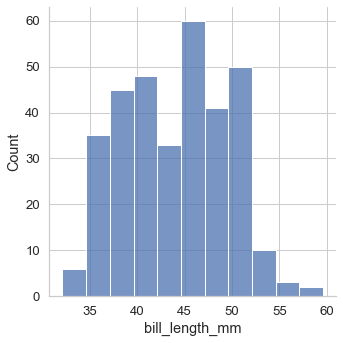

In [112]:
# Create a histogram of 'bill_length_mm'
sns.displot(data = penguins, x = 'bill_length_mm');

As you can see, Seaborn automatically assing labels according to defined parameters. 

## Line plot

## Boxplot

## Barplot

**neskor**

Firstly, we discuss how you can control **aesthetic of a figure** in other words **theme** based on your needs and preferences. It always depends on whether you are exploring the data for yourself or you want to communicate your insights to an audience. During your exploratory part, your visualizations do not need to be perfect and polished as long as they serve the purpose of revealing necessary and useful insight. 

But if your visualization will be presented to others, it is appropriate to take care of plot´s appearance in order to make it appealing and catching the attention. This is true also in the case of theme. Let´s look at the one of the example dataset and try to change the theme of created visualization.